In [1]:
what_were_covering = {
    1: "Data (prepare and load)",
    2: "build model",
    3: "fitting the model to data",
    4: "making predictions and evaluating a model(inference)",
    5: "saving and loading the model",
    6: "putting all together"
}
what_were_covering

{1: 'Data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data',
 4: 'making predictions and evaluating a model(inference)',
 5: 'saving and loading the model',
 6: 'putting all together'}

In [2]:
import torch
from torch import nn # contains all the building blocks for neural networks

**1. Data (preparing and loading data)**

Data can be almost anything:
 - Excel spreadsheet
 - Images of any kind
 - Videos (Youtube videos)
 - Audio like songs and podcasts
 - DNA pattens
 - Text

Machine learning is a game of two parts:
 - Get data into a numerical representation
 - build a model to learn patterns in that numerical representation

**Simple regression model**

In [3]:
weight = 0.7
bias = 0.3
# create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [4]:
## splitting the data into training and testing
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [5]:
len(X_test), len(y_test), len(X_train), len(y_train)

(10, 10, 40, 40)

In [6]:
import matplotlib.pyplot as plt

In [7]:
def plot_predictions(train_data = X_train, 
                     train_labels = y_train, 
                     test_data = X_test, 
                     test_labels = y_test,
                     predictions = None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    # show legend
    plt.legend(prop={"size": 14})

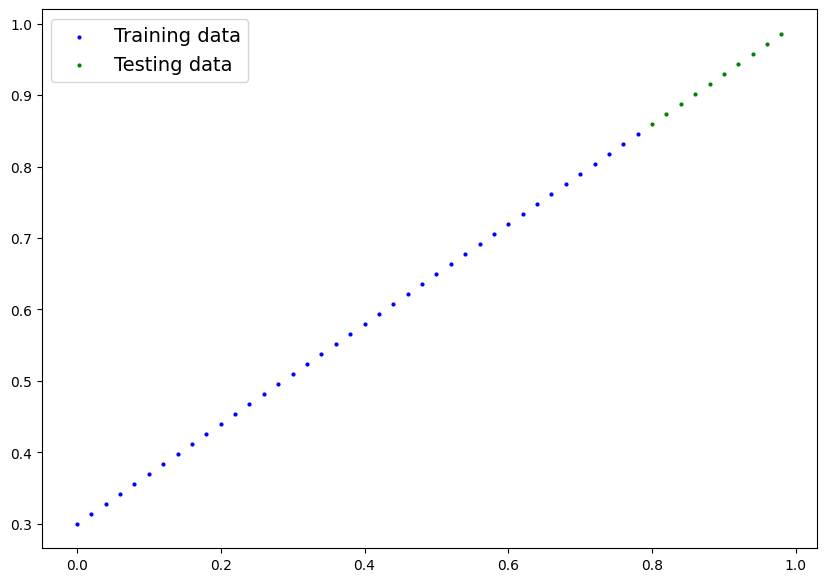

In [8]:
plot_predictions()

**Building first pytorch module**

Our first pytorch model!

In [9]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1))
        self.bias = nn.Parameter(torch.randn(1)) 
        
    def forward(self, x: torch.Tensor)->torch.Tensor:
        return self.weights * x + self.bias
            

 **Pytorch model building essentials**

- torch.nn - Containing all the building blocks (computational graphs)
- torch.nn.Parameter - what parameters should our model try to learn, often Pytorch layer from torch.nn will set them for us
- torch.nn.Module the base class for building models
- torch.optim - this is where the optimizers in Pytorch live, they will help 
with gradient decent
- def forward() - all nn.Module subclasses requie you to overwrite forward
which is the activation function

Now we've created a model, let's see what's inside ouir model .parameters()

In [10]:
# create a random seed
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [12]:
weight, bias

(0.7, 0.3)

**Making prediction using torch.inference_mode()**

To check our model's predictive power, let's see how well it predicts
y_test based on X_test.
When we pass data through our mode, it's going to run it through the forward 
method.

In [13]:
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

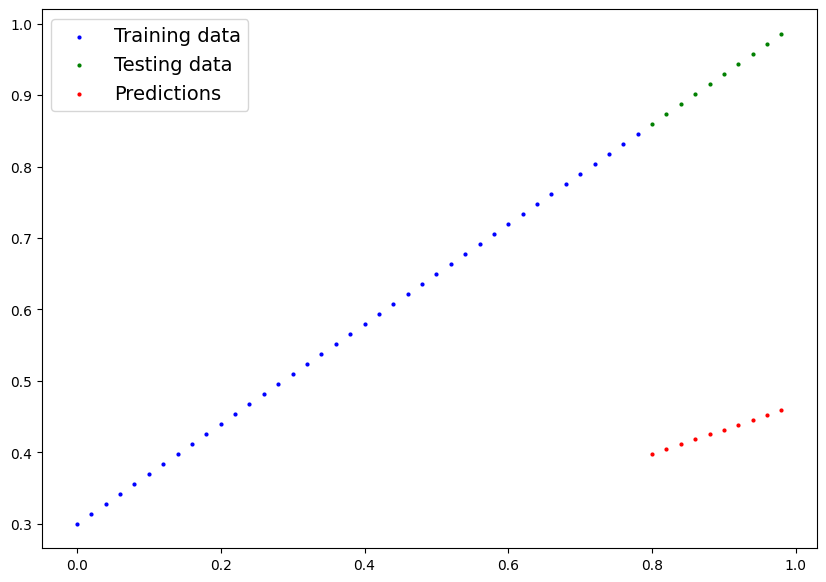

In [14]:
plot_predictions(predictions=y_preds)

**Train a model**

The whole idea of training is for a model to move from some **unknown**
parameters(these may be random) to some *known* parameters.

Or in other workds from poor representation of data to a better representation
of the data.

One way to measure how poor or how wrong your models predictions are is to use
a loss function.

* **Loss function:**  A function to measure how wrong your model's predictions are to the ideal outputs

* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters

And specifically for Pytorch, we need:
 - Training loop
 - Testing loop

In [15]:
model_0.state_dict() # checkout model parameters

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [16]:
# setup the loss function
loss_fun = nn.L1Loss()

# setup an optimizer -> Stockastic gradient descent
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

**Building a training loop and testing loop**
A couple of things we need in a training loop:

0. Loop through the data.
1. Forward propagation into the network.
2. Calculate the loss.(compare forward propagation predictions to actual labels)
3. Optimizer zero grad.
4. Loss backward - back propagation (dL/dw)
5. Optimizer step - use the optimizer to adjust our model's parameters to try to improve the loss (gradient descent)

In [17]:
epoch_count = []
loss_values = []
test_loss_values = []

In [18]:
# epoch - one loop through the data - hyper parameters
epochs = 200
for epoch in range(epochs):
    model_0.train() # enter the train mode
    # forward propagation
    y_pred = model_0(X_train)
    # calculate the loss
    loss = loss_fun(y_pred, y_train)
    print(f"Loss: {loss}")
    # optimizer zero grad
    optimizer.zero_grad()
    # back propagation
    loss.backward()
    # gradient descent
    optimizer.step()
    # turnoff the training mode
    model_0.eval()
    
    with torch.inference_mode():
        test_preds = model_0(X_test)
        test_loss = loss_fun(test_preds, y_test)
        
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    epoch_count.append(epoch)
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss {test_loss}")
        

Loss: 0.31288138031959534
Epoch: 0 | Loss: 0.31288138031959534 | Test loss 0.48106518387794495
Loss: 0.3013603389263153
Loss: 0.28983935713768005
Loss: 0.2783183455467224
Loss: 0.26679736375808716
Loss: 0.2552763521671295
Loss: 0.24375534057617188
Loss: 0.23223432898521423
Loss: 0.22071333229541779
Loss: 0.20919232070446014
Loss: 0.1976713240146637
Epoch: 10 | Loss: 0.1976713240146637 | Test loss 0.3463551998138428
Loss: 0.18615034222602844
Loss: 0.1746293306350708
Loss: 0.16310831904411316
Loss: 0.1515873372554779
Loss: 0.14006635546684265
Loss: 0.1285453587770462
Loss: 0.11702437698841095
Loss: 0.1060912236571312
Loss: 0.09681284427642822
Loss: 0.08908725529909134
Epoch: 20 | Loss: 0.08908725529909134 | Test loss 0.21729660034179688
Loss: 0.08227583020925522
Loss: 0.07638873159885406
Loss: 0.07160007208585739
Loss: 0.06747635453939438
Loss: 0.06395438313484192
Loss: 0.06097004935145378
Loss: 0.05845819041132927
Loss: 0.05635259300470352
Loss: 0.0545857772231102
Loss: 0.05314852669835

In [19]:
import numpy
torch.tensor(loss_values).cpu().numpy(), torch.tensor(test_loss_values).cpu().numpy()

(array([0.31288138, 0.30136034, 0.28983936, 0.27831835, 0.26679736,
        0.25527635, 0.24375534, 0.23223433, 0.22071333, 0.20919232,
        0.19767132, 0.18615034, 0.17462933, 0.16310832, 0.15158734,
        0.14006636, 0.12854536, 0.11702438, 0.10609122, 0.09681284,
        0.08908726, 0.08227583, 0.07638873, 0.07160007, 0.06747635,
        0.06395438, 0.06097005, 0.05845819, 0.05635259, 0.05458578,
        0.05314853, 0.05181945, 0.05069301, 0.04982285, 0.04895269,
        0.04819351, 0.04753182, 0.04692793, 0.04642332, 0.04591871,
        0.04543797, 0.04503796, 0.04463796, 0.04423796, 0.04383796,
        0.04343796, 0.04307463, 0.04272563, 0.04237663, 0.04202763,
        0.04167863, 0.04132963, 0.04098063, 0.04063163, 0.04028264,
        0.03993364, 0.03958464, 0.03923564, 0.03888664, 0.03853764,
        0.03818933, 0.03785244, 0.03750344, 0.03716412, 0.03681822,
        0.03647511, 0.03613304, 0.0357861 , 0.03544784, 0.03509884,
        0.0347609 , 0.03441364, 0.03407188, 0.03

In [20]:
weight, bias

(0.7, 0.3)

In [21]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

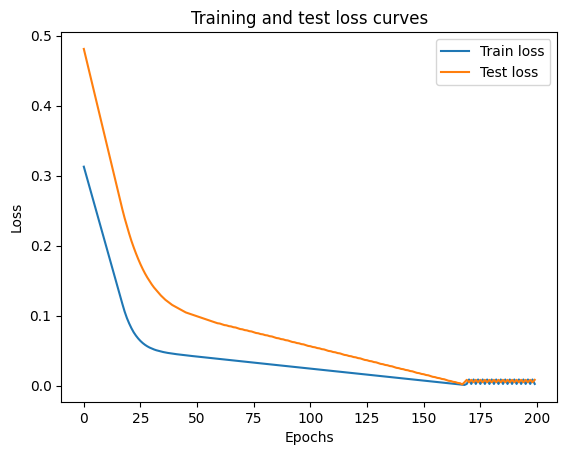

In [23]:
plt.plot(torch.tensor(epoch_count).cpu().numpy(), torch.tensor(loss_values).cpu().numpy(), label="Train loss")
plt.plot(torch.tensor(epoch_count).cpu().numpy(), torch.tensor(test_loss_values).cpu().numpy(), label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();